### Submission: 
Submit your assignment in GITHUB Repository in the form of .ipynb (code must merged to the main branch) Include code, visualization and explanation of each task. 

You can follow these initial steps:
•	Create a GITHUB repository
•	Add your team member as collaborators.
•	Create your separate branch from main.


### Assignment: Analyzing Stock Data

### Background:
You have been provided with a dataset containing historical stock price data for a company. 
Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

Dataset: You can use any stock price dataset or create a synthetic dataset for this assignment. The dataset should contain at least the following columns:

Date (representing the trading dates)
Open (the opening price of the stock on that date)
Close (the closing price of the stock on that date)
High (the highest price of the stock during the trading session)
Low (the lowest price of the stock during the trading session)
Volume (the trading volume of the stock on that date)
You can use libraries like yfinance to fetch real stock data or create a synthetic dataset using NumPy.

Tasks:

#### Data Loading and Inspection:
Load the stock price dataset into a Pandas DataFrame.
Display the first 5 rows of the DataFrame.
Check for missing values and handle them if necessary.

#### Data Exploration:
Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price.
Create a line plot of the 'Close' price over time (use Date on the x-axis).


#### Data Analysis:
Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days).
Identify and visualize any significant price changes or trends in the stock.
Volume Analysis

#### Analyze the trading volume of the stock:
Calculate the average daily trading volume.
Visualize the trading volume over time.

#### Financial Metrics:
Calculate daily returns for the stock.
Calculate and visualize the cumulative returns of the stock over time.
Calculate and visualize the rolling standard deviation of the daily returns.

#### Correlation Analysis:
Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500).
Visualize the correlation using a scatter plot.

#### Conclusion:
Summarize your findings from the analysis.
Provide insights into the stock's performance and any trends or patterns you observed.


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
ticker_symbol = "HDFCBANK.NS" 
start_date = "2021-01-01"
end_date = "2021-12-31"

df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1440.000000,1443.000000,1420.599976,1425.050049,1386.698486,4405469
2021-01-04,1438.000000,1438.000000,1399.000000,1416.000000,1377.891968,7870096
2021-01-05,1419.199951,1430.750000,1409.000000,1426.699951,1388.303955,7193412
2021-01-06,1435.000000,1440.000000,1413.099976,1420.550049,1382.319458,11067025
2021-01-07,1432.500000,1432.599976,1412.550049,1416.250000,1378.135132,9947421


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df['Close'].describe()


count     247.000000
mean     1512.149394
std        67.950401
min      1367.050049
25%      1466.375000
50%      1503.900024
75%      1558.875000
max      1688.699951
Name: Close, dtype: float64

In [7]:
df.reset_index(inplace=True)

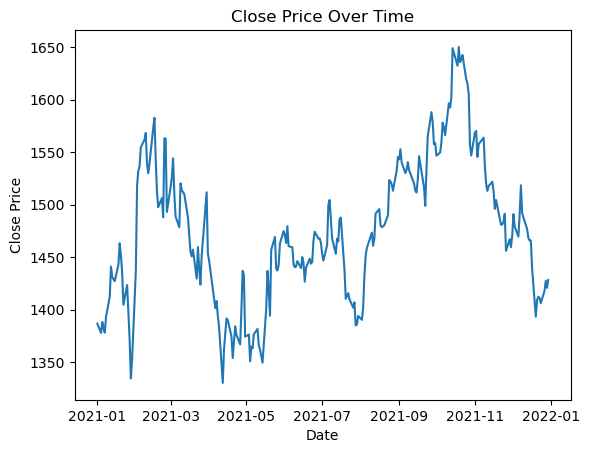

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Adj Close'])

# Labeling the axes
plt.xlabel('Date')
plt.ylabel('Close Price')

# Adding a title
plt.title('Close Price Over Time')

# Display the plot
plt.show()


In [9]:
df['30D_MA'] = df['Adj Close'].rolling(window=30).mean()
df

,Date,Open,High,Low,Close,Adj Close,Volume,30D_MA
0,2021-01-01,1440.000000,1443.000000,1420.599976,1425.050049,1386.698486,4405469,NaN
1,2021-01-04,1438.000000,1438.000000,1399.000000,1416.000000,1377.891968,7870096,NaN
2,2021-01-05,1419.199951,1430.750000,1409.000000,1426.699951,1388.303955,7193412,NaN
3,2021-01-06,1435.000000,1440.000000,1413.099976,1420.550049,1382.319458,11067025,NaN
4,2021-01-07,1432.500000,1432.599976,1412.550049,1416.250000,1378.135132,9947421,NaN
...,...,...,...,...,...,...,...,...
242,2021-12-24,1445.500000,1452.000000,1428.000000,1438.900024,1406.235596,2780512,1470.740609
243,2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1417.865601,2352549,1467.411283
244,2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1427.638428,2725339,1464.269267
245,2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1420.846191,3834351,1461.202177


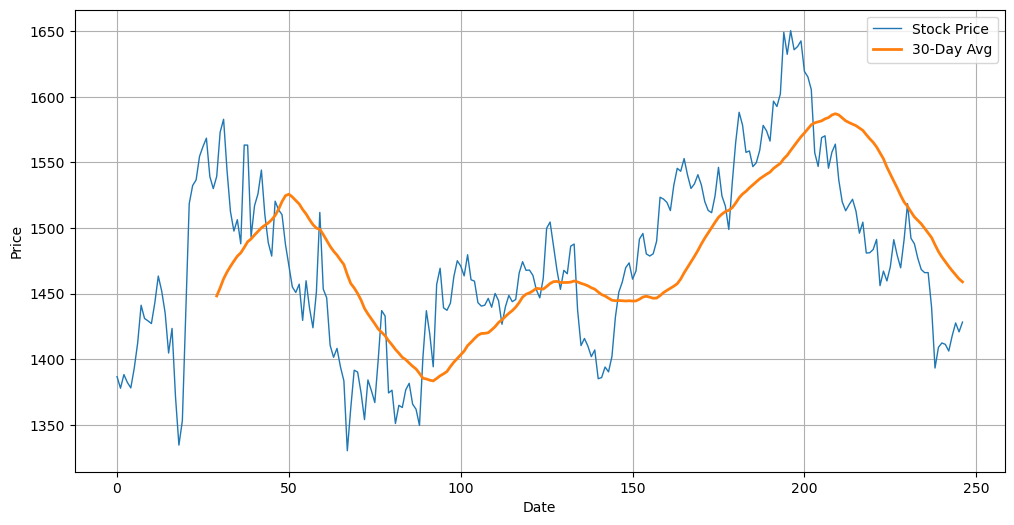

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Stock Price', linewidth=1)
plt.plot(df.index, df['30D_MA'], label='30-Day Avg', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

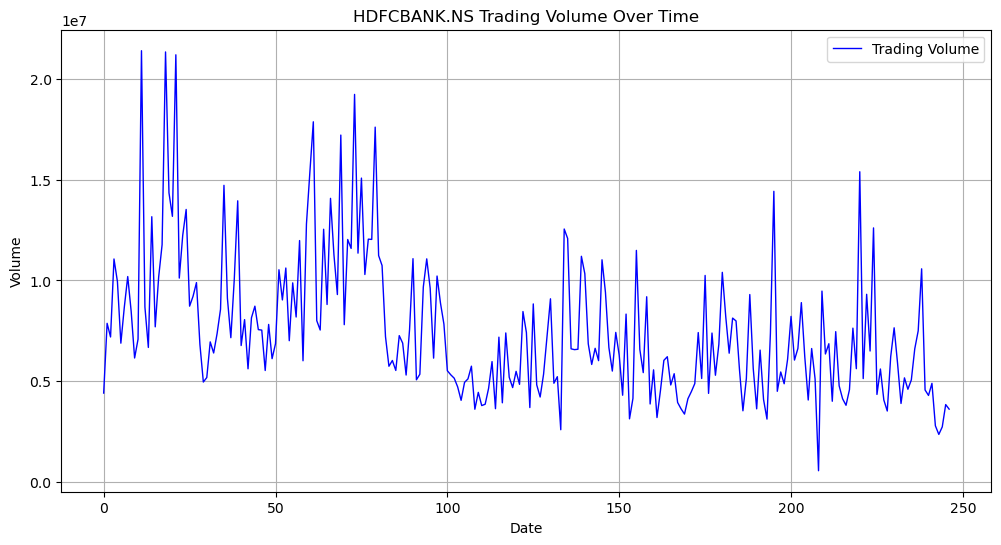

In [11]:
average_daily_volume = df['Volume'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', linewidth=1, color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{ticker_symbol} Trading Volume Over Time')
plt.legend()
plt.grid()
plt.show()

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,30D_MA
0,2021-01-01,1440.000000,1443.000000,1420.599976,1425.050049,1386.698486,4405469,NaN
1,2021-01-04,1438.000000,1438.000000,1399.000000,1416.000000,1377.891968,7870096,NaN
2,2021-01-05,1419.199951,1430.750000,1409.000000,1426.699951,1388.303955,7193412,NaN
3,2021-01-06,1435.000000,1440.000000,1413.099976,1420.550049,1382.319458,11067025,NaN
4,2021-01-07,1432.500000,1432.599976,1412.550049,1416.250000,1378.135132,9947421,NaN
...,...,...,...,...,...,...,...,...
242,2021-12-24,1445.500000,1452.000000,1428.000000,1438.900024,1406.235596,2780512,1470.740609
243,2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1417.865601,2352549,1467.411283
244,2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1427.638428,2725339,1464.269267
245,2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1420.846191,3834351,1461.202177


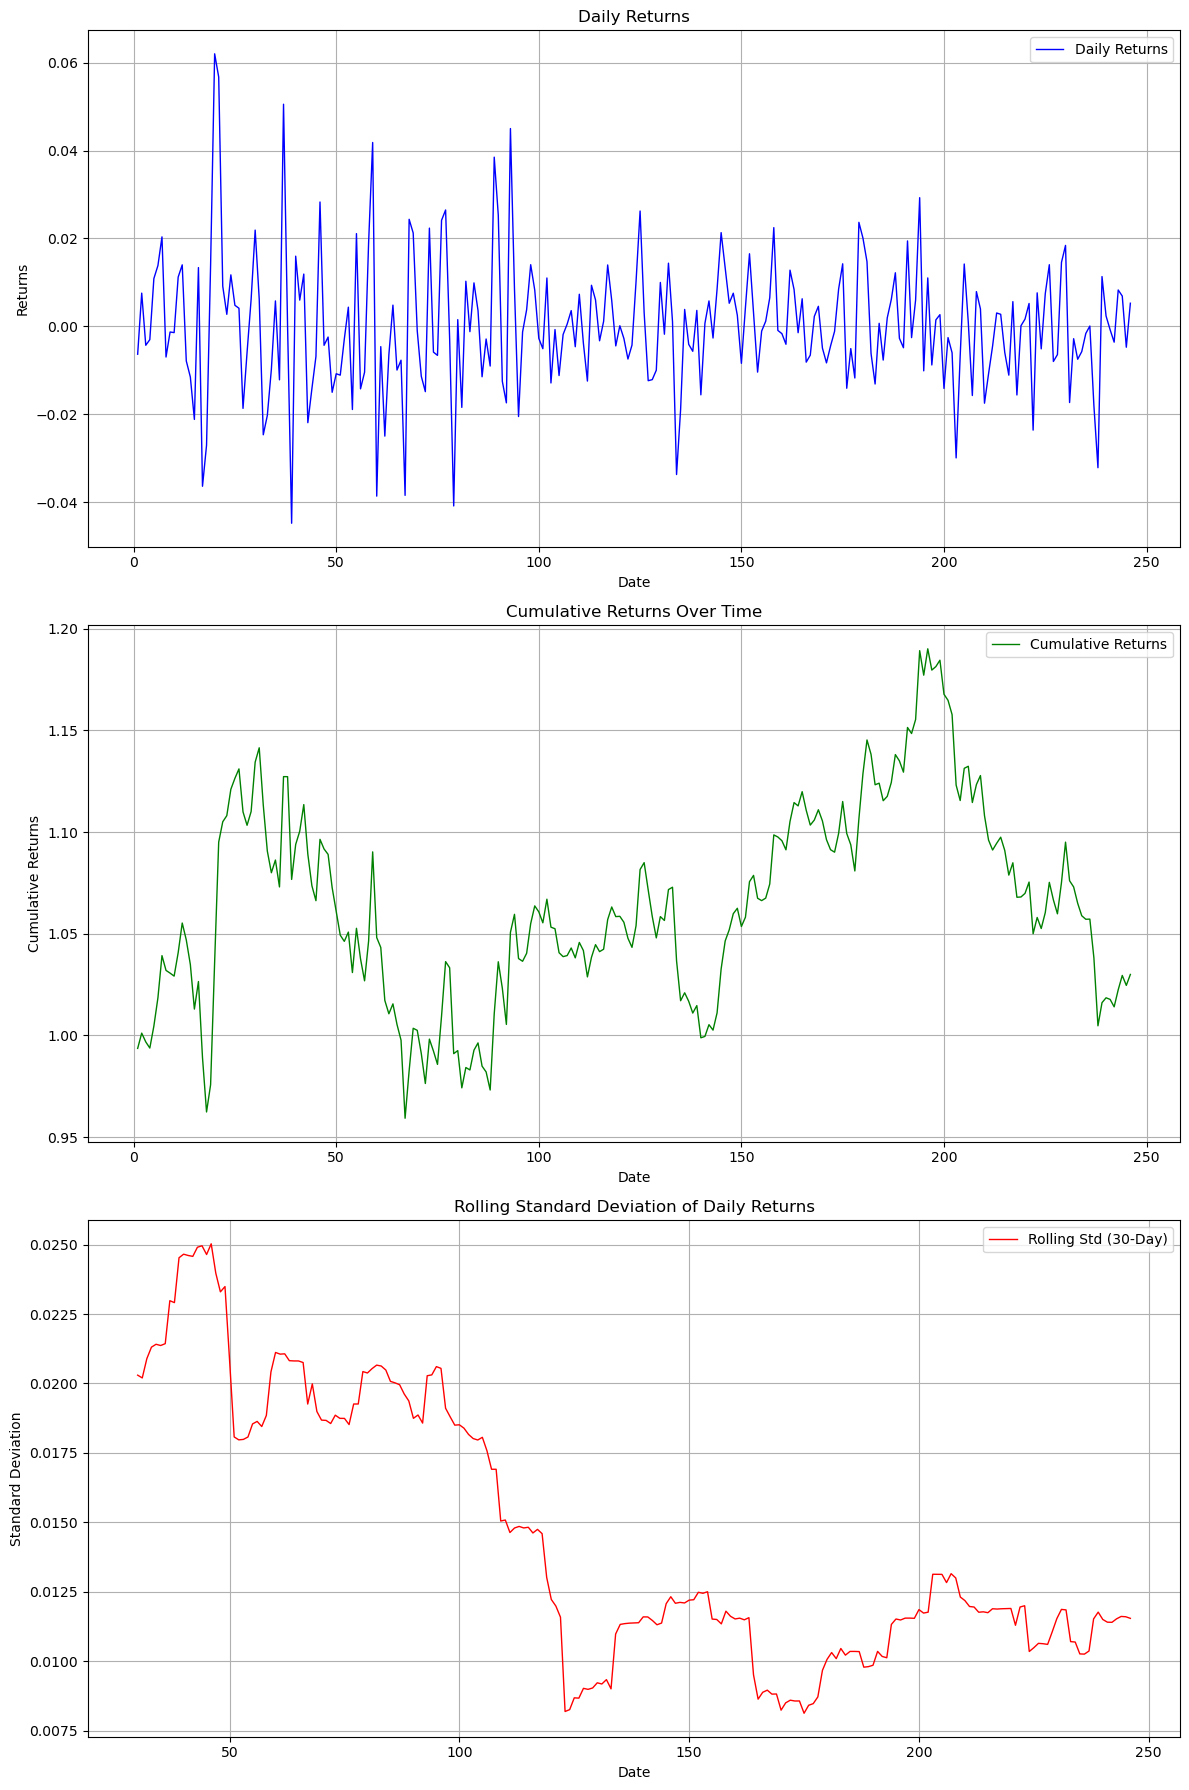

In [17]:
hdfc_daily_ret = df['Adj Close'].pct_change().dropna()
df['Cumulative_Return'] = (1 + hdfc_daily_ret).cumprod()
df['Rolling_Std'] = hdfc_daily_ret.rolling(window=30).std()

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot daily returns
axes[0].plot(df.index[1:], hdfc_daily_ret, label='Daily Returns', linewidth=1, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')
axes[0].set_title('Daily Returns')
axes[0].legend()
axes[0].grid()

# Plot cumulative returns
axes[1].plot(df.index, df['Cumulative_Return'], label='Cumulative Returns', linewidth=1, color='green')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Returns')
axes[1].set_title('Cumulative Returns Over Time')
axes[1].legend()
axes[1].grid(True)

# Plot rolling standard deviation
axes[2].plot(df.index, df['Rolling_Std'], label='Rolling Std (30-Day)', linewidth=1, color='red')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Standard Deviation')
axes[2].set_title('Rolling Standard Deviation of Daily Returns')
axes[2].legend()
axes[2].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [41]:
sensex_symbol = "^BSESN"     
sensex_data = yf.download(sensex_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [42]:
sensex_return = sensex_data['Adj Close'].pct_change().dropna()
sensex_return

Date
2020-01-03   -0.003892
2020-01-06   -0.019004
2020-01-07    0.004741
2020-01-08   -0.001266
2020-01-09    0.015547
                ...   
2021-12-24   -0.003332
2021-12-27    0.005180
2021-12-28    0.008311
2021-12-29   -0.001572
2021-12-30   -0.000210
Name: Adj Close, Length: 494, dtype: float64

In [43]:
correlation = hdfc_daily_ret[1:].corr(sensex_return)
correlation

nan

In [44]:
hdfc_daily_ret

1     -0.006351
2      0.007556
3     -0.004311
4     -0.003027
5      0.010874
         ...   
242   -0.003601
243    0.008270
244    0.006893
245   -0.004758
246    0.005262
Name: Adj Close, Length: 246, dtype: float64

In [48]:
hdfc_symbol = "HDFC.BO"  
hdfc_data = yf.download(hdfc_symbol, start=start_date, end=end_date)

hdfc_returns = hdfc_data['Adj Close'].pct_change().dropna()
correlation = hdfc_returns.corr(sensex_returns)


[*********************100%***********************]  1 of 1 completed


In [49]:
correlation

0.8085810700904519